# Heart Disease Prediction Project (using /content/Heart Disease/dataset.csv)

This notebook walks through the process of building a predictive model to determine if a patient has heart disease based on various health indicators.

The steps covered include:
1.  **Data Loading:** Loading the dataset into a pandas DataFrame.
2.  **Data Cleaning and Preparation:** Checking for missing values and ensuring data types are suitable.
3.  **Exploratory Data Analysis (EDA):** Exploring feature distributions and relationships.
4.  **Data Visualization:** Creating visualizations to better understand the data and identify patterns.
5.  **Data Preparation for Modeling:** Separating features and the target variable, and splitting the data into training and testing sets.
6.  **Model Building and Evaluation:** Building and evaluating a machine learning model (Logistic Regression) to predict heart disease.

## Data Loading

In [46]:
# Import necessary libraries for data manipulation, analysis, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import os
os.makedirs("images", exist_ok=True)

In [60]:
# Load the dataset from the specified path
dataset_zip_path = '/content/heart_disease.zip'
extracted_path = '/content/Heart Disease/'
# Corrected path to the CSV file within the extracted directory
dataset_csv_path = extracted_path + 'Heart Disease/' + 'dataset.csv'

try:
    import zipfile
    import os
    # Unzip the file
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Dataset unzipped successfully!")

    # Check if the extracted file exists
    if os.path.exists(dataset_csv_path):
        print(f"Extracted CSV found at: {dataset_csv_path}")
        # Attempt to read the CSV file into a pandas DataFrame
        disease_df = pd.read_csv(dataset_csv_path)
        print("Dataset loaded successfully!")
        # Display the first 5 rows of the DataFrame to get a preview of the data
        display(disease_df.head())
    else:
        print(f"Error: Extracted CSV not found at {dataset_csv_path}")
        print("Contents of extracted directory:")
        # List contents of the expected directory
        print(os.listdir(extracted_path + 'Heart Disease/'))


except FileNotFoundError:
    # Handle the case where the dataset zip file is not found
    print(f"Error: Dataset zip file not found at {dataset_zip_path}")
    print("Please ensure the zip file is in the correct location.")
except Exception as e:
    print(f"An error occurred during unzipping or loading: {e}")

Dataset unzipped successfully!
Extracted CSV found at: /content/Heart Disease/Heart Disease/dataset.csv
Dataset loaded successfully!


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [61]:
display(disease_df.head())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Data Cleaning and Preparation

### Subtask:
Check for missing values and handle them appropriately. Ensure data types are suitable for analysis.

**Reasoning**:
Check for missing values and display data types to understand the data structure and identify any issues.

In [62]:
# Check for missing values in each column of the DataFrame
print("Missing values per column:")
print(disease_df.isnull().sum())

Missing values per column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [63]:
# Display the data types of each column and non-null counts
print("\nData types:")
disease_df.info()


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


## Exploratory Data Analysis (EDA)

### Subtask:
Explore the distributions of individual features and relationships between features. Visualize key variables.

**Reasoning**:
Generate descriptive statistics and calculate the correlation matrix to explore feature distributions and relationships.

In [64]:
# 1. Generate descriptive statistics for the numerical columns
print("Descriptive Statistics:")
display(disease_df.describe())

# 2. Calculate the correlation matrix between all pairs of features
correlation_matrix = disease_df.corr(numeric_only=True)

# 3. Print the calculated correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000



Correlation Matrix:
                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.015096         0.149055      0.257692   
sex                  0.015096  1.000000         0.138405     -0.006443   
chest pain type      0.149055  0.138405         1.000000      0.009466   
resting bp s         0.257692 -0.006443         0.009466      1.000000   
cholesterol         -0.046472 -0.208441        -0.109396      0.099037   
fasting blood sugar  0.178923  0.110961         0.076492      0.088235   
resting ecg          0.194595 -0.022225         0.035705      0.095860   
max heart rate      -0.368676 -0.181837        -0.337491     -0.101357   
exercise angina      0.188095  0.194380         0.403428      0.142435   
oldpeak              0.245093  0.096390         0.224106      0.176111   
ST slope             0.237749  0.127913         0.276949      0.089384   
target               0.262029  0.311267         0.460127      0.121415   

                

In [65]:
# 2. Calculate the correlation matrix
correlation_matrix = disease_df.corr()

# 3. Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.015096         0.149055      0.257692   
sex                  0.015096  1.000000         0.138405     -0.006443   
chest pain type      0.149055  0.138405         1.000000      0.009466   
resting bp s         0.257692 -0.006443         0.009466      1.000000   
cholesterol         -0.046472 -0.208441        -0.109396      0.099037   
fasting blood sugar  0.178923  0.110961         0.076492      0.088235   
resting ecg          0.194595 -0.022225         0.035705      0.095860   
max heart rate      -0.368676 -0.181837        -0.337491     -0.101357   
exercise angina      0.188095  0.194380         0.403428      0.142435   
oldpeak              0.245093  0.096390         0.224106      0.176111   
ST slope             0.237749  0.127913         0.276949      0.089384   
target               0.262029  0.311267         0.460127      0.121415   

                

## Data Visualization

### Subtask:
Create visualizations to understand the data better and identify patterns related to heart disease. This could include distributions of features, correlations, and comparisons between patients with and without heart disease.

**Reasoning**:
Generate the visualizations as requested in the instructions, including a heatmap of the correlation matrix, distribution plots for selected features, and comparison plots between features and the 'target' variable.

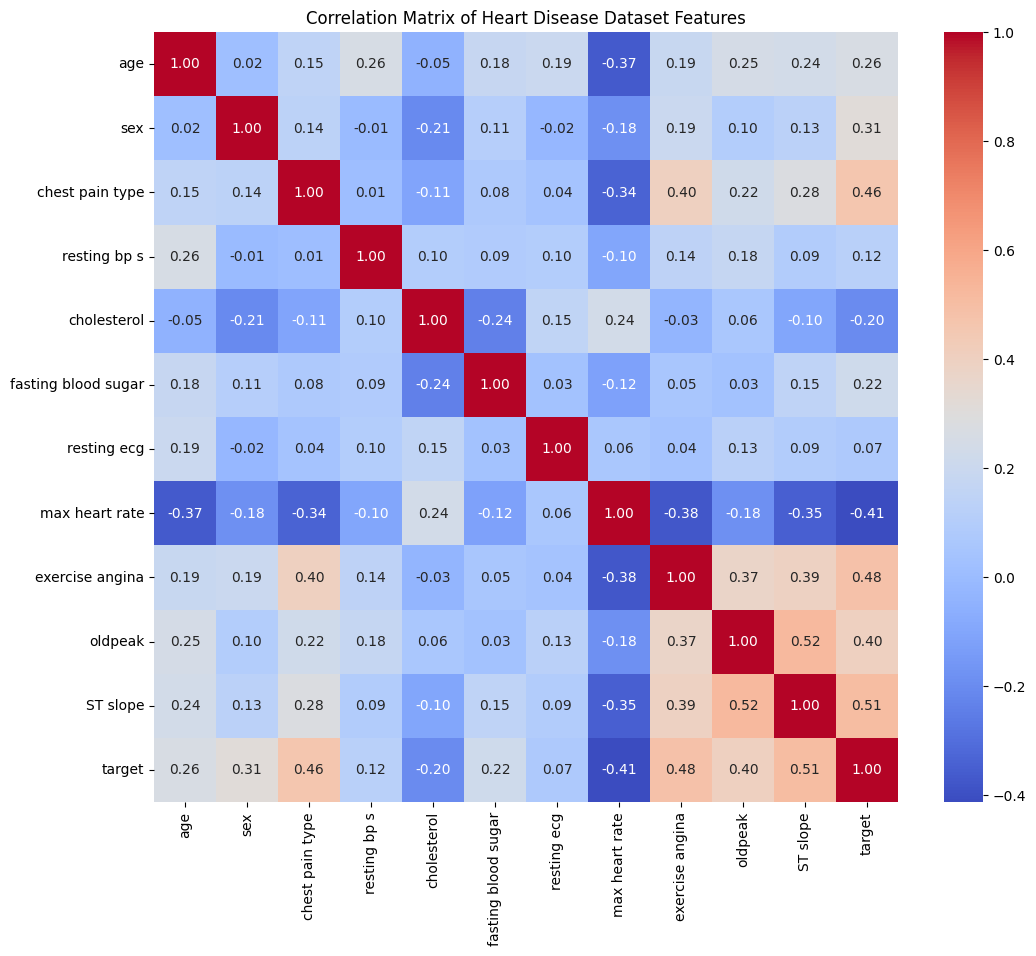

In [66]:
# 1. Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(12, 10)) # Set the size of the plot
# Use seaborn's heatmap to visualize the correlation matrix
# annot=True displays the correlation values on the heatmap
# cmap='coolwarm' sets the color scheme
# fmt=".2f" formats the annotations to two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Dataset Features') # Set the title of the heatmap
plt.savefig("images/heart_correlation.png")
plt.show() # Display the plot

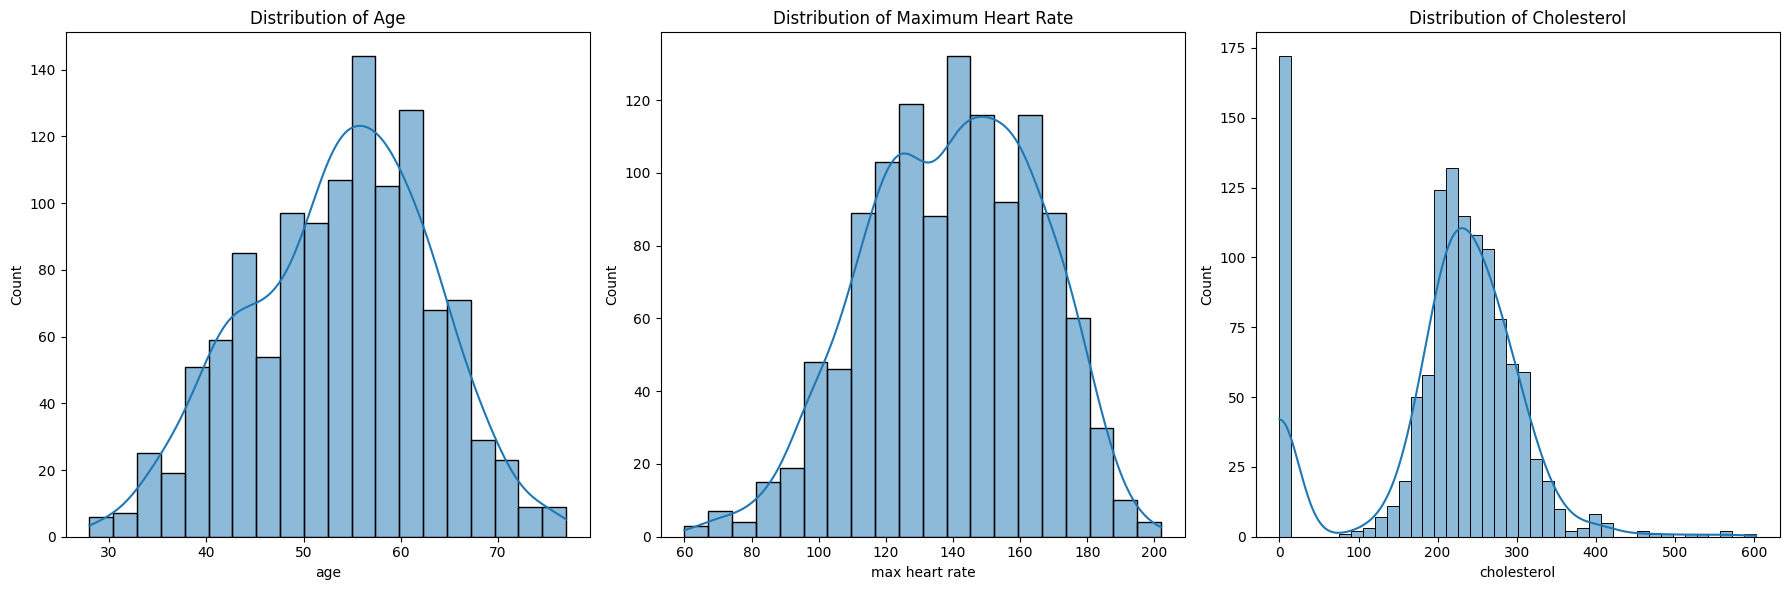

In [67]:
# 2. Create histograms or distribution plots for key features
# Create a figure and a set of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for 'age'
sns.histplot(data=disease_df, x='age', kde=True, ax=axes[0]) # kde=True adds a kernel density estimate line
axes[0].set_title('Distribution of Age') # Set title for the first subplot

# Plot histogram for 'max heart rate'
sns.histplot(data=disease_df, x='max heart rate', kde=True, ax=axes[1]) # Note: Using the column name from this dataset
axes[1].set_title('Distribution of Maximum Heart Rate') # Set title for the second subplot

# Plot histogram for 'cholesterol'
sns.histplot(data=disease_df, x='cholesterol', kde=True, ax=axes[2]) # Note: Using the column name from this dataset
axes[2].set_title('Distribution of Cholesterol') # Set title for the third subplot

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.savefig("images/heart_distribution.png")
plt.show() # Display the plots

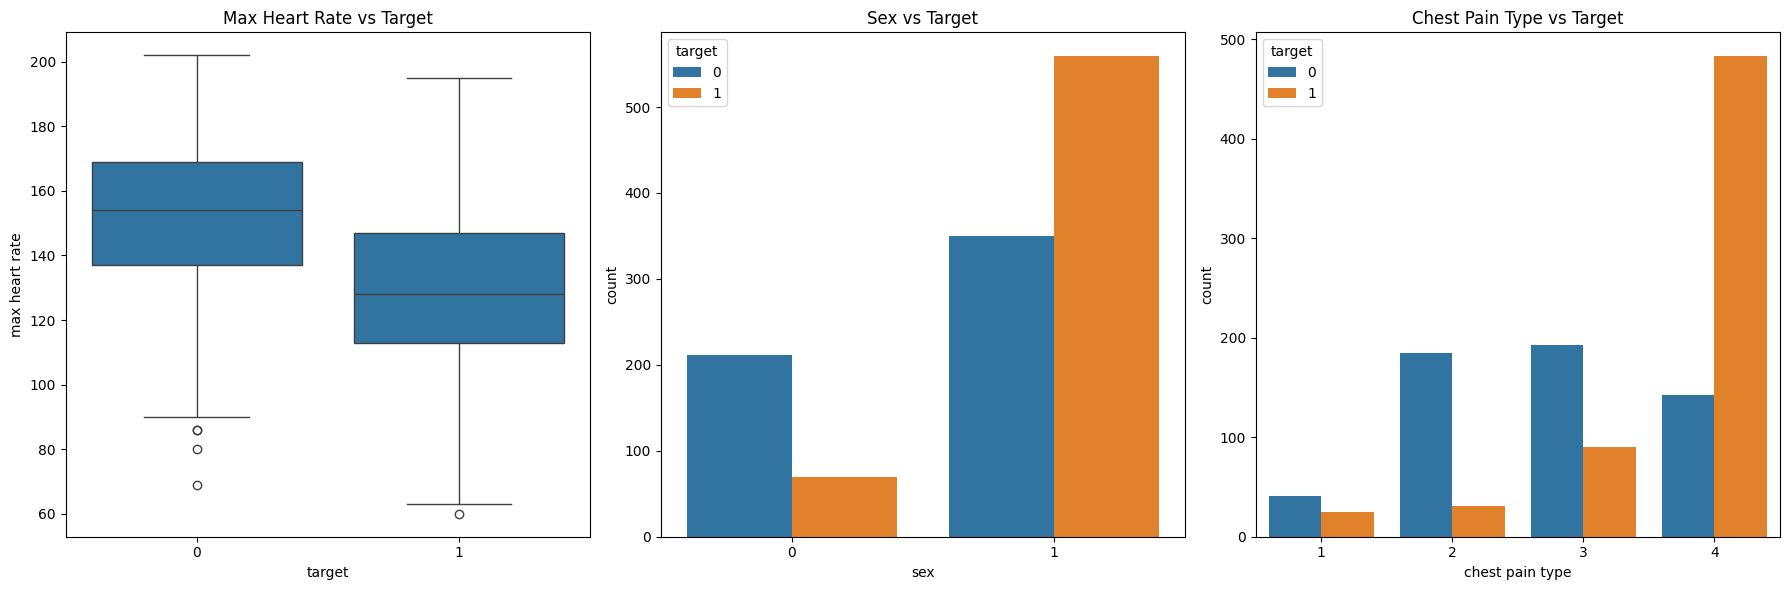

In [68]:
# 3. Create visualizations comparing features between patients with and without heart disease
# Create a figure and a set of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create a boxplot for 'max heart rate' vs 'target'
sns.boxplot(data=disease_df, x='target', y='max heart rate', ax=axes[0]) # Note: Using the column name from this dataset
axes[0].set_title('Max Heart Rate vs Target') # Set title for the first subplot

# Create a countplot for 'sex' vs 'target'
sns.countplot(data=disease_df, x='sex', hue='target', ax=axes[1]) # hue='target' separates counts by the target variable
axes[1].set_title('Sex vs Target') # Set title for the second subplot

# Create a countplot for 'chest pain type' vs 'target'
sns.countplot(data=disease_df, x='chest pain type', hue='target', ax=axes[2]) # Note: Using the column name from this dataset
axes[2].set_title('Chest Pain Type vs Target') # Set title for the third subplot

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.savefig("images/heart_sex_distribution.png")
plt.show() # Display the plots

## Data Preparation for Modeling

### Subtask:
Prepare the data for building a predictive model. This involves separating features and the target variable and splitting the data into training and testing sets.

**Reasoning**:
Separate the features (X) from the target variable (y) and then split the data into training and testing sets (X_train, X_test, y_train, y_test) using `train_test_split` from `sklearn.model_selection`. This is necessary to train and evaluate a predictive model.

In [69]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
# X contains all columns except 'target'
X = disease_df.drop('target', axis=1)
# y contains only the 'target' column
y = disease_df['target']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (952, 11)
Shape of X_test: (238, 11)
Shape of y_train: (952,)
Shape of y_test: (238,)


In [70]:
# Print the shapes of the training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (952, 11)
Shape of X_test: (238, 11)
Shape of y_train: (952,)
Shape of y_test: (238,)


## Model Building and Evaluation

### Subtask:
Build a predictive model for heart disease, train it, and evaluate its performance.

**Reasoning**:
Use Logistic Regression to build a classification model. Train the model on the training data, make predictions on the test data, and evaluate the model using classification metrics.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Choose a model (Logistic Regression)
# Logistic Regression is a common algorithm for binary classification
# random_state=42 ensures reproducibility
# Increased max_iter to 1000 to help with convergence if needed
model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model using the training data
model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model's performance using various metrics
print("Model Evaluation:")
# Calculate and print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))
# Calculate and print the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Print the classification report (includes precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8613445378151261

Confusion Matrix:
 [[ 90  17]
 [ 16 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



## Summary:

### Data Analysis Key Findings

* Based on the analysis of `/content/Heart Disease/dataset.csv`:
* The dataset contains 1190 entries with no missing values and suitable data types for analysis.
* Features such as `max heart rate`, `exercise angina`, `oldpeak`, and `ST slope` show notable correlations with the `target` variable (presence of heart disease).
* Visualizations highlight differences in `max heart rate`, `sex`, and `chest pain type` between patients with and without heart disease .